In [25]:
import pandas as pd
from matplotlib.dates import DateFormatter

In [26]:
df = pd.read_json('data1.json')

columns = df.columns

first_20_rows = df.head(20)

columns, first_20_rows


(Index(['code', 'msg', 'data', 'success'], dtype='object'),
            code      msg                                               data  \
 dataMap       0  success  {'Bitmex': [0.01, 0.001, 0.0005, 0.01, -0.014,...   
 dateList      0  success  [1676332800000, 1676361600000, 1676390400000, ...   
 frDataMap     0  success  {'Bitmex': [0.01, 0.0039000000000000003, 0.007...   
 priceList     0  success  [21764.1, 21758.9, 22043.6, 22191.4, 22104.2, ...   
 
            success  
 dataMap       True  
 dateList      True  
 frDataMap     True  
 priceList     True  )

In [27]:
df['data']

dataMap      {'Bitmex': [0.01, 0.001, 0.0005, 0.01, -0.014,...
dateList     [1676332800000, 1676361600000, 1676390400000, ...
frDataMap    {'Bitmex': [0.01, 0.0039000000000000003, 0.007...
priceList    [21764.1, 21758.9, 22043.6, 22191.4, 22104.2, ...
Name: data, dtype: object

In [28]:
data_map_df = pd.DataFrame(df.loc['dataMap', 'data'])

date_list_series = pd.Series(df.loc['dateList', 'data'])

fr_data_map_df = pd.DataFrame(df.loc['frDataMap', 'data'])

price_list_series = pd.Series(df.loc['priceList', 'data'])

data_map_df.head(), date_list_series.head(), fr_data_map_df.head(), price_list_series.head()


(   Bitmex   Binance   Bybit       OKX  Huobi    Gate  Bitget      dYdX  \
 0  0.0100  0.010000  0.0100  0.005063   0.01  0.0038  0.0091  0.000665   
 1  0.0010  0.010000  0.0100  0.006860   0.01  0.0033  0.0108 -0.002993   
 2  0.0005  0.008816  0.0100 -0.002235   0.01  0.0042  0.0094  0.008002   
 3  0.0100  0.002409  0.0013  0.003620   0.01 -0.0028  0.0025  0.003202   
 4 -0.0140  0.002676  0.0000 -0.008421   0.01 -0.0011  0.0035 -0.009016   
 
      CoinEx  
 0  0.032596  
 1  0.009877  
 2 -0.018577  
 3 -0.025069  
 4 -0.006476  ,
 0    1676332800000
 1    1676361600000
 2    1676390400000
 3    1676419200000
 4    1676448000000
 dtype: int64,
    Bitmex   Binance   Bybit       OKX  Huobi    Gate  Bitget      dYdX  \
 0  0.0100  0.010000  0.0100  0.008311   0.01  0.0038  0.0091  0.000665   
 1  0.0039  0.010000  0.0100  0.005063   0.01  0.0033  0.0108 -0.002993   
 2  0.0070  0.008816  0.0100  0.006860   0.01  0.0042  0.0094  0.008002   
 3  0.0100  0.002409  0.0013 -0.002235   0

In [29]:
new_df = fr_data_map_df.copy()
new_df['dateList'] = date_list_series
new_df['priceList'] = price_list_series

new_df.head()


,Bitmex,Binance,Bybit,OKX,Huobi,Gate,Bitget,dYdX,CoinEx,dateList,priceList
0,0.0100,0.010000,0.0100,0.008311,0.01,0.0038,0.0091,0.000665,0.020610,1676332800000,21764.1
1,0.0039,0.010000,0.0100,0.005063,0.01,0.0033,0.0108,-0.002993,0.032542,1676361600000,21758.9
2,0.0070,0.008816,0.0100,0.006860,0.01,0.0042,0.0094,0.008002,0.009877,1676390400000,22043.6
3,0.0100,0.002409,0.0013,-0.002235,0.01,-0.0028,0.0025,0.003202,-0.018577,1676419200000,22191.4
4,0.0100,0.002676,0.0000,0.003620,0.01,-0.0011,0.0035,-0.009016,-0.025069,1676448000000,22104.2


In [30]:
import matplotlib.pyplot as plt

In [31]:
new_df['dateList'] = pd.to_datetime(new_df['dateList'], unit='ms')

In [32]:
new_df['dateList']

0     2023-02-14 00:00:00.000
1     2023-02-14 08:00:00.000
2     2023-02-14 16:00:00.000
3     2023-02-15 00:00:00.000
4     2023-02-15 08:00:00.000
                ...          
538   2023-08-12 16:00:00.000
539   2023-08-13 00:00:00.000
540   2023-08-13 08:00:00.000
541   2023-08-13 16:00:00.000
542   2023-08-13 22:32:36.927
Name: dateList, Length: 543, dtype: datetime64[ns]

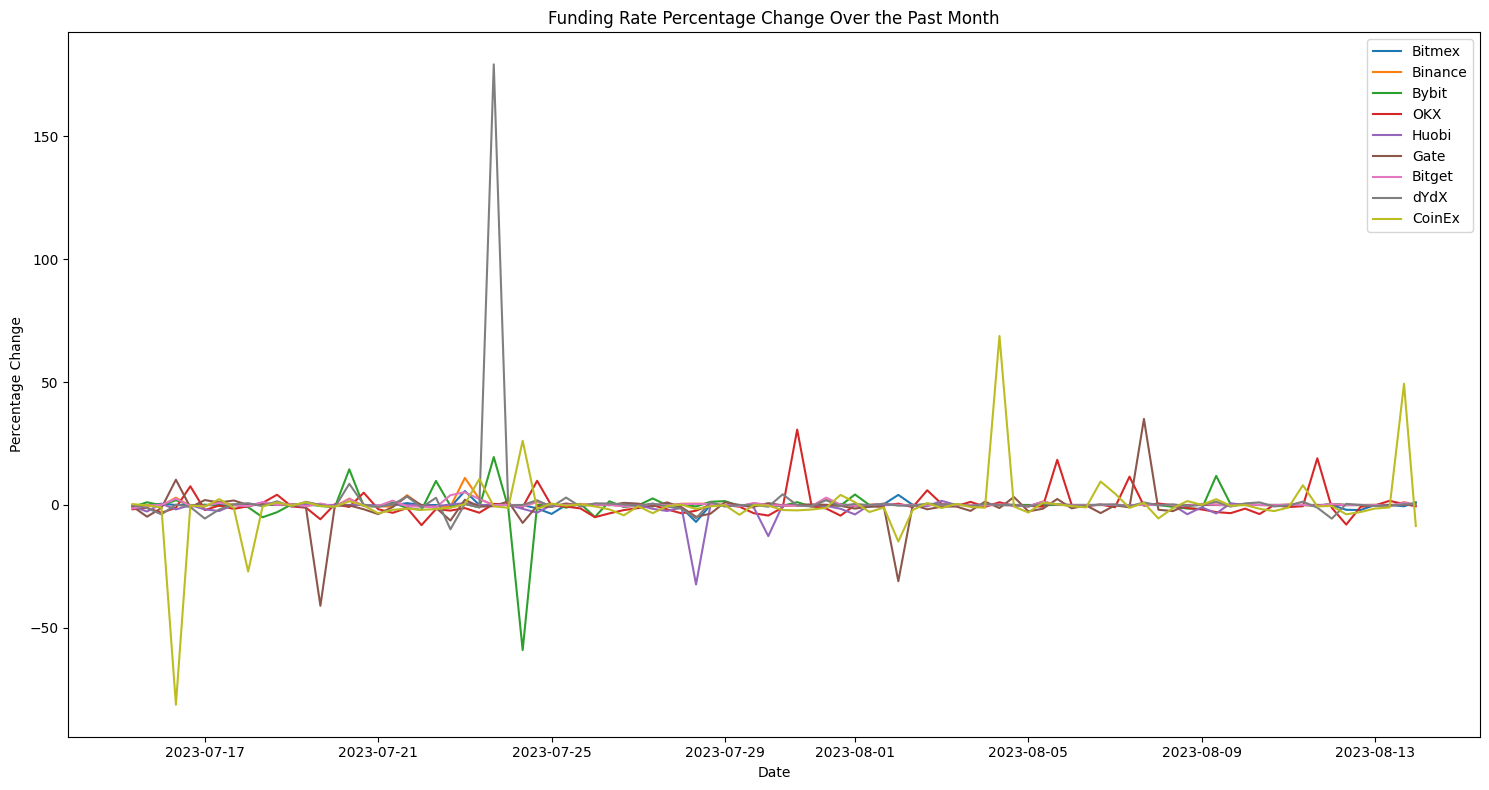

In [40]:
# Extracting data for the past 1 month
one_month_ago = new_df['dateList'].max() - pd.Timedelta(days=30)
filtered_df = new_df[new_df['dateList'] > one_month_ago]

# Calculating the percentage change of the funding rate
percentage_change_df = filtered_df.drop(columns=['dateList', 'priceList']).pct_change().dropna()

# Plotting the funding rate percentage change for all platforms on one graph
plt.figure(figsize=(15, 8))
for platform in percentage_change_df.columns:
    plt.plot(filtered_df['dateList'][1:], percentage_change_df[platform], label=platform)

plt.title('Funding Rate Percentage Change Over the Past Month')
plt.ylabel('Percentage Change')
plt.xlabel('Date')
plt.legend()
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

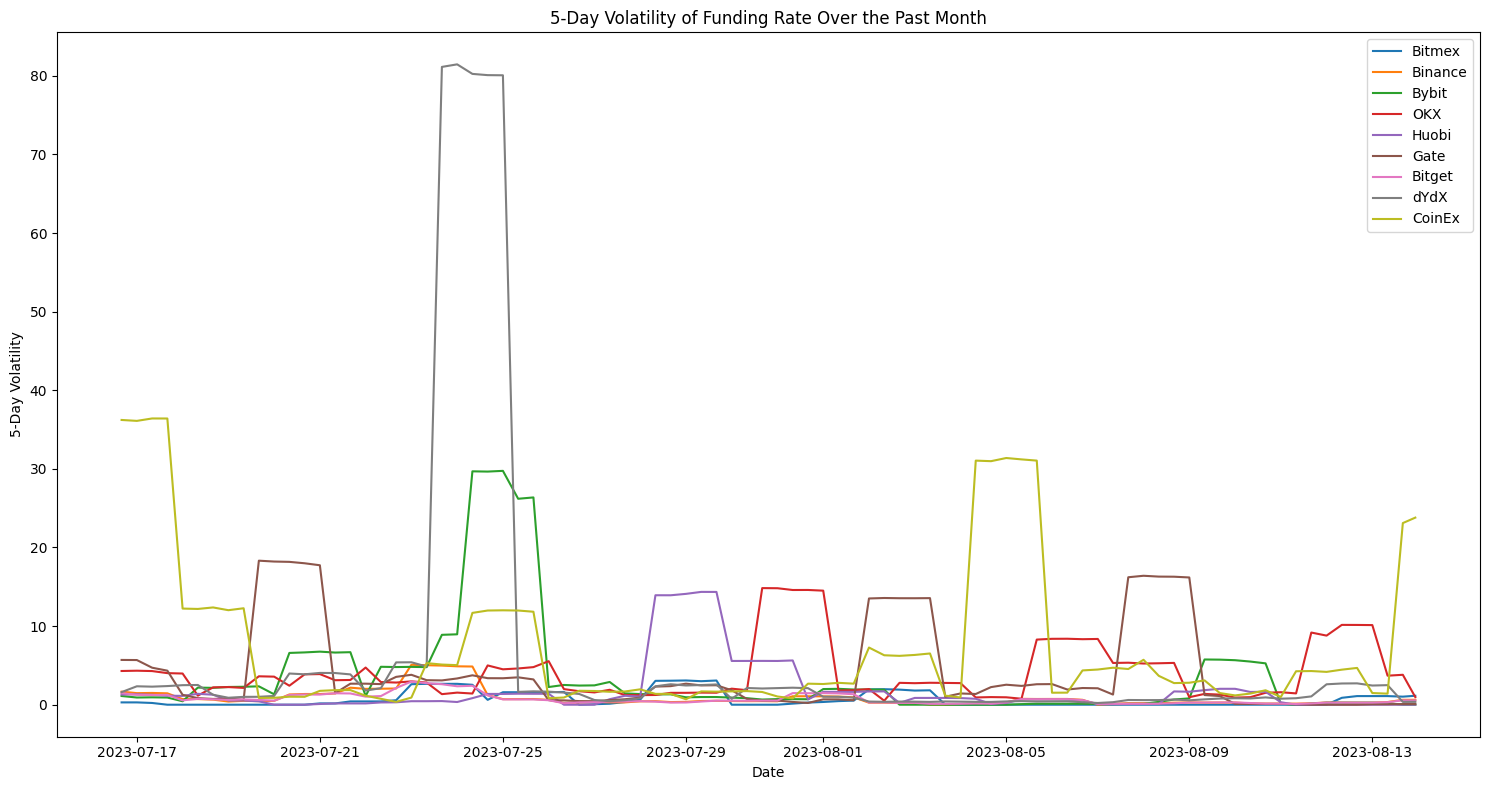

In [41]:
# Calculate the 5-day rolling standard deviation (volatility) for each platform's funding rate over the past month
rolling_volatility = filtered_df.drop(columns=['dateList', 'priceList']).pct_change().rolling(window=5).std()

# Plotting the 5-day volatility for all platforms
plt.figure(figsize=(15, 8))
for platform in rolling_volatility.columns:
    plt.plot(filtered_df['dateList'], rolling_volatility[platform], label=platform)

plt.title('5-Day Volatility of Funding Rate Over the Past Month')
plt.ylabel('5-Day Volatility')
plt.xlabel('Date')
plt.legend()
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [42]:
# Calculating the average funding rate and its volatility for each platform over the past month
avg_funding_rate_month = percentage_change_df.mean()
volatility_funding_rate_month = percentage_change_df.std()

avg_funding_rate_month_df = pd.DataFrame({
    'Platform': avg_funding_rate_month.index,
    'Average Funding Rate (%)': avg_funding_rate_month.values * 100,  # Convert to percentage
    'Volatility (Std Dev %)': volatility_funding_rate_month.values * 100  # Convert to percentage
})

avg_funding_rate_month_df


,Platform,Average Funding Rate (%),Volatility (Std Dev %)
0,Bitmex,-8.447695,118.535699
1,Binance,26.119721,140.065541
2,Bybit,-17.284659,704.835852
3,OKX,8.576188,519.329134
4,Huobi,-83.607242,372.901765
5,Gate,-76.585271,686.606973
6,Bitget,22.396672,98.164144
7,dYdX,190.959597,1900.974202
8,CoinEx,-18.936608,1340.275074
